In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78593373/fitting-a-planck-curve-on-my-spectrometer-data

In [2]:
data = pd.read_csv("https://pastebin.com/raw/xdLY6aLG", sep="\t", decimal=",").dropna(axis=1)

In [3]:
data["Wavelength"] /= 1e9
data["Intensity"] -= data["Intensity"].min()

In [11]:
h = 6.62607015e-34
c = 299792458
kb = 1.380649e-23

In [20]:
def model(x, T, A):
    return A * (2 * h * c ** 2 / np.power(x, 5)) * (1 / (np.exp(h * c / (x * kb * T)) - 1.))

In [21]:
popt, pcov = optimize.curve_fit(model, data["Wavelength"], data["Intensity"], p0=(4500., 1.))
popt, pcov

(array([4.60245428e+03, 6.01634624e-12]),
 array([[ 2.69474317e+03, -1.73187726e-11],
        [-1.73187726e-11,  1.16842665e-25]]))

In [22]:
yhat = model(data["Wavelength"], *popt)

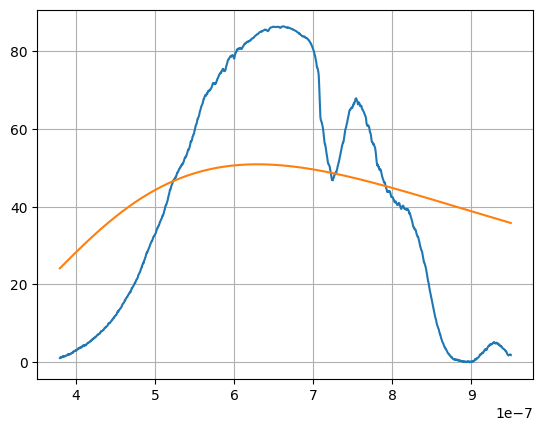

In [23]:
fig, axe = plt.subplots()
axe.plot(data["Wavelength"], data["Intensity"])
axe.plot(data["Wavelength"], yhat)
axe.grid()